In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from scipy.io import loadmat
import pandas as pd


# Boston Dataset

In [3]:
from sklearn.datasets import load_boston
x, y = load_boston(return_X_y=True)

In [4]:
print('X shape:', x.shape)
print('Y shape:', y.shape)

X shape: (506, 13)
Y shape: (506,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit AdaBoost

In [10]:
def score_adaboost(n=50, lr=1.0, loss='linear'):
    clf = AdaBoostRegressor(n_estimators=n, learning_rate=lr, loss=loss)
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)
    
score_adaboost()

0.8387064289372755

Write a short description (min. 100 words) of your findings, including **what dataset and implementation** you used, how you **set up** your experiment, what the **effect of different parameter settings** was, what the **performance** was, **which variables** were important et cetera.

In [23]:
def print_metrics(scores):
    print("Range: {:.3f} ~ {:.3f}".format(np.min(scores),np.max(scores)))
    print("Mean:  {:.3f}".format(np.mean(scores)))
    print("Var:   {:.3f}".format(np.std(scores)))

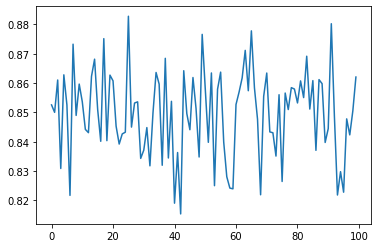

Range: 0.815 ~ 0.883
Mean:  0.850
Var:   0.015


In [27]:
# Using non-seeded (random) version
scores = []
for _ in range(100):
    scores.append(score_adaboost())
    
plt.plot(scores)
plt.show()

print_metrics(scores)

**Observation #1**: With random init, performance of the regressor varies greatly, but average performance always at 85%.

In [31]:
# Different sizes (n)
for n in [50, 100, 200, 400, 800, 1600, 3200]:
    print(f'Computing for n={n}')
    scores = []
    for _ in range(100):
        scores.append(score_adaboost(n=n))
    print_metrics(scores)
    print()

Computing for n=50
Range: 0.809 ~ 0.885
Mean:  0.853
Var:   0.014

Computing for n=100
Range: 0.818 ~ 0.884
Mean:  0.850
Var:   0.011

Computing for n=200
Range: 0.827 ~ 0.874
Mean:  0.853
Var:   0.009

Computing for n=400
Range: 0.827 ~ 0.870
Mean:  0.851
Var:   0.007

Computing for n=800
Range: 0.836 ~ 0.883
Mean:  0.852
Var:   0.007

Computing for n=1600
Range: 0.835 ~ 0.883
Mean:  0.851
Var:   0.006

Computing for n=3200
Range: 0.837 ~ 0.861
Mean:  0.851
Var:   0.004



**Observation #2**: Performance still varies greatly, but different mean for larger n. Notable is that variance decreases for larger ensembles, which makes sense given that the result is already an aggregate. We note that peak performance is achieved for n=50 and n=200, which gives us a hint that it's still subject to randomness, but probably lies somewhere around here. Most importantly, many more do not give much of an improvement on this dataset

In [33]:
# Different learning rates (lr)
for lr in [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0]:
    print(f'Computing for learning rate = {lr}')
    scores = []
    for _ in range(100):
        scores.append(score_adaboost(lr=lr))
    print_metrics(scores)
    print()

Computing for learning rate = 0.01
Range: 0.764 ~ 0.869
Mean:  0.805
Var:   0.025

Computing for learning rate = 0.02
Range: 0.767 ~ 0.866
Mean:  0.811
Var:   0.023

Computing for learning rate = 0.05
Range: 0.800 ~ 0.878
Mean:  0.855
Var:   0.019

Computing for learning rate = 0.1
Range: 0.816 ~ 0.884
Mean:  0.865
Var:   0.011

Computing for learning rate = 0.2
Range: 0.825 ~ 0.891
Mean:  0.862
Var:   0.012

Computing for learning rate = 0.5
Range: 0.830 ~ 0.885
Mean:  0.853
Var:   0.012

Computing for learning rate = 1.0
Range: 0.814 ~ 0.882
Mean:  0.850
Var:   0.013

Computing for learning rate = 2.0
Range: 0.802 ~ 0.895
Mean:  0.859
Var:   0.017



**Observation #3**: Low LRs are bad for the score. Default is 0.1, below decreases rapidly. Best scores achieved for 0.1~0.2, above which performance is decreased again. Notably also lowest variance for 0.1, which makes sense.

In [64]:
# Different loss functions
for loss in ['linear', 'square', 'exponential']:
    print(f'Computing for {loss} loss')
    scores = []
    for _ in range(400):
        scores.append(score_adaboost(loss=loss))
    print_metrics(scores)
    print()

Computing for linear loss
Range: 0.808 ~ 0.886
Mean:  0.851
Var:   0.014

Computing for square loss
Range: 0.811 ~ 0.901
Mean:  0.863
Var:   0.017

Computing for exponential loss
Range: 0.800 ~ 0.877
Mean:  0.845
Var:   0.012



**Observation #4:** Highest score for square loss. Interestingly, also highest variance. Exponential achieves slightly worse loss than linear.

# Combining Best Parameters

In [61]:
scores = []
for _ in range(400):
    scores.append(score_adaboost(n=50, lr=0.1, loss='square'))
    
print_metrics(scores)

Range: 0.841 ~ 0.893
Mean:  0.870
Var:   0.007
